In [260]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder ,StandardScaler  

In [261]:
df = pd.read_csv(r'C:\Users\max\Downloads\Stars.csv')

In [262]:
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,Brown Dwarf
1,3042,0.000500,0.1542,16.60,Red,M,Brown Dwarf
2,2600,0.000300,0.1020,18.70,Red,M,Brown Dwarf
3,2800,0.000200,0.1600,16.65,Red,M,Brown Dwarf
4,1939,0.000138,0.1030,20.06,Red,M,Brown Dwarf
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,Hypergiant
236,30839,834042.000000,1194.0000,-10.63,Blue,O,Hypergiant
237,8829,537493.000000,1423.0000,-10.73,White,A,Hypergiant
238,9235,404940.000000,1112.0000,-11.23,White,A,Hypergiant


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 13.2+ KB


In [264]:
df.describe()

,Temperature,L,R,A_M
count,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396
std,9552.425037,179432.244940,517.155763,10.532512
min,1939.000000,0.000080,0.008400,-11.920000
25%,3344.250000,0.000865,0.102750,-6.232500
50%,5776.000000,0.070500,0.762500,8.313000
75%,15055.500000,198050.000000,42.750000,13.697500
max,40000.000000,849420.000000,1948.500000,20.060000


In [265]:
df.isna().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

In [266]:
df.duplicated().sum()

0

# Exploratory Data analysis

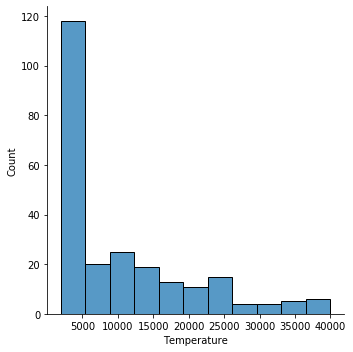

In [267]:
sns.displot(data=df,x=df['Temperature'])

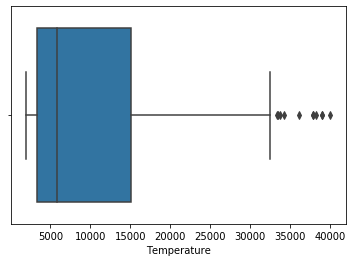

In [268]:
sns.boxplot(data=df,x=df['Temperature'])

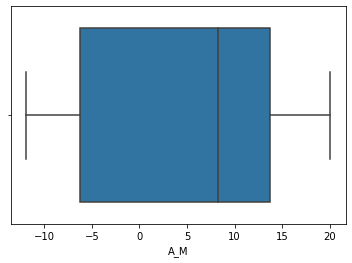

In [269]:
sns.boxplot(data=df,x=df['A_M'])

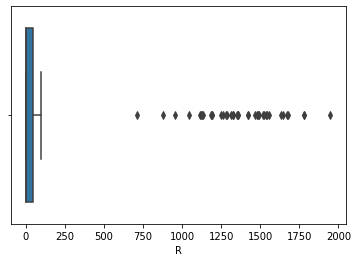

In [270]:
sns.boxplot(data=df,x=df['R'])

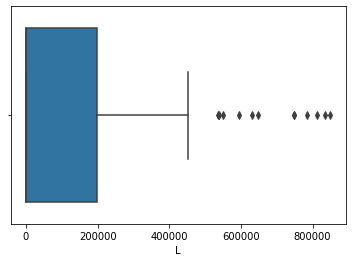

In [271]:
sns.boxplot(data=df,x=df['L'])

# Data Preprocessing

In [328]:
from datasist.structdata import detect_outliers

In [329]:
outliers_indices = detect_outliers(df, 0, ['L','R','Temperature'])
len(outliers_indices)

52

In [330]:
df.drop(outliers_indices, inplace=True)


In [331]:
df.shape

(188, 7)

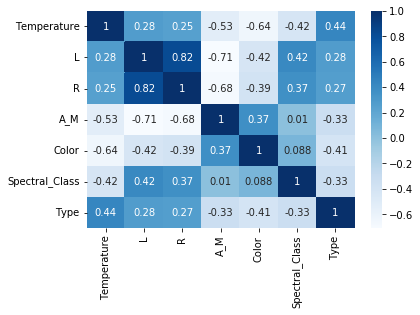

In [332]:
sns.heatmap(df.corr(),annot = True, cmap = 'Blues')

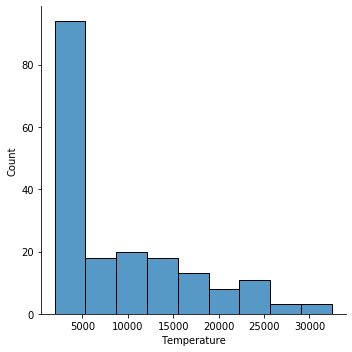

In [333]:
sns.displot(data=df,x=df['Temperature'])

In [334]:
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.120,8,5,0
1,3042,0.000500,0.1542,16.600,8,5,0
2,2600,0.000300,0.1020,18.700,8,5,0
3,2800,0.000200,0.1600,16.650,8,5,0
4,1939,0.000138,0.1030,20.060,8,5,0
...,...,...,...,...,...,...,...
221,12749,332520.000000,76.0000,-7.020,0,6,4
222,9383,342940.000000,98.0000,-6.980,0,6,4
224,16787,246730.000000,62.0000,-6.350,0,6,4
225,18734,224780.000000,46.0000,-7.450,0,6,4


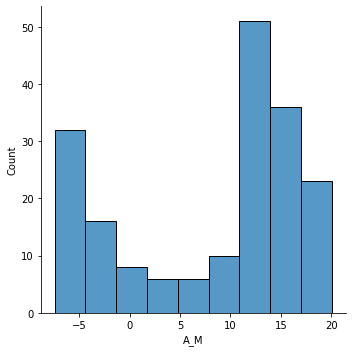

In [335]:
sns.displot(data=df, x="A_M")

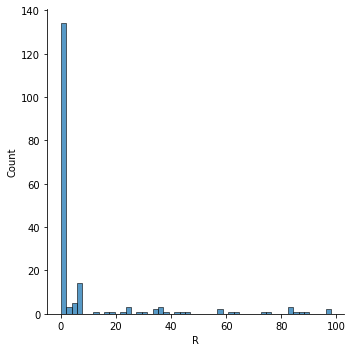

In [336]:
sns.displot(data=df, x="R")

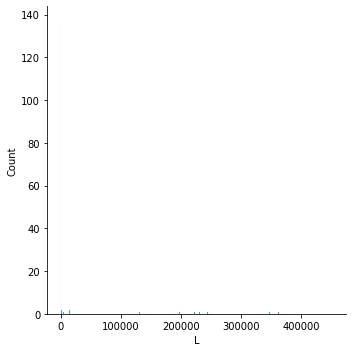

In [337]:
sns.displot(data=df, x="L")

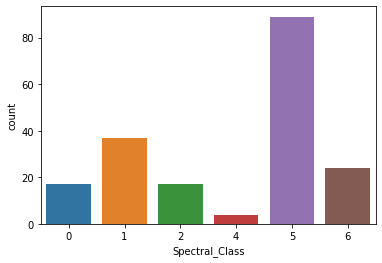

In [338]:
sns.countplot(data=df,x=df['Spectral_Class'])

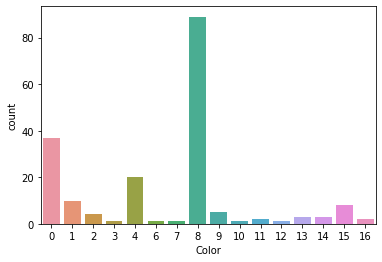

In [339]:
sns.countplot(data=df,x=df['Color'])

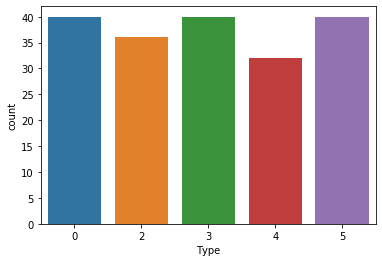

In [340]:
sns.countplot(data=df,x=df['Type'])

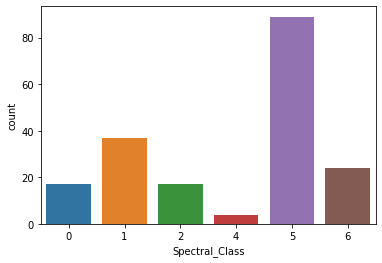

In [341]:
sns.countplot(data=df,x=df['Spectral_Class'])

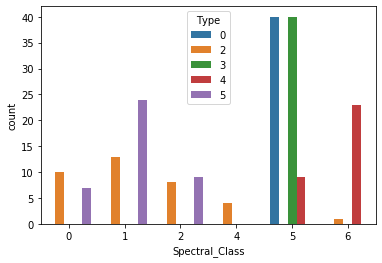

In [342]:
sns.countplot(data=df,x=df['Spectral_Class'],hue=df['Type'])

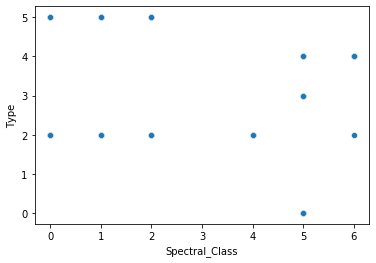

In [343]:
sns.scatterplot(data=df,x=df['Spectral_Class'],y=df['Type'])

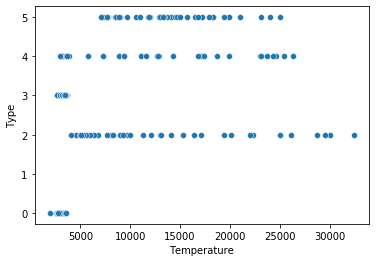

In [344]:
sns.scatterplot(data=df,x=df['Temperature'],y=df['Type'])

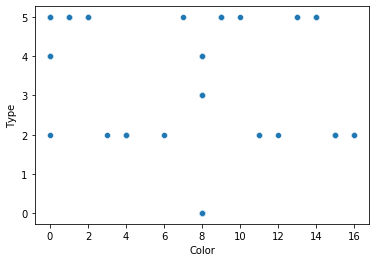

In [345]:
sns.scatterplot(data=df,x=df['Color'],y=df['Type'])

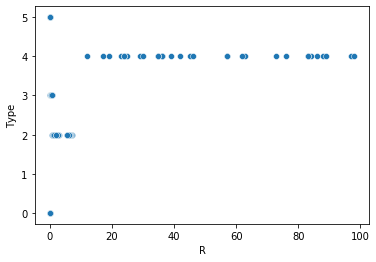

In [346]:
sns.scatterplot(data=df,x=df['R'],y=df['Type'])

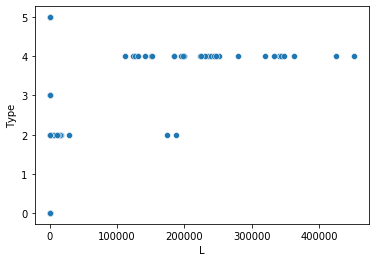

In [347]:
sns.scatterplot(data=df,x=df['L'],y=df['Type'])

In [348]:
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.120,8,5,0
1,3042,0.000500,0.1542,16.600,8,5,0
2,2600,0.000300,0.1020,18.700,8,5,0
3,2800,0.000200,0.1600,16.650,8,5,0
4,1939,0.000138,0.1030,20.060,8,5,0
...,...,...,...,...,...,...,...
221,12749,332520.000000,76.0000,-7.020,0,6,4
222,9383,342940.000000,98.0000,-6.980,0,6,4
224,16787,246730.000000,62.0000,-6.350,0,6,4
225,18734,224780.000000,46.0000,-7.450,0,6,4


## Encoding

In [349]:
df['Spectral_Class'].value_counts()

5    89
1    37
6    24
0    17
2    17
4     4
Name: Spectral_Class, dtype: int64

In [350]:
from sklearn.preprocessing import LabelEncoder

In [351]:
encoder = LabelEncoder()

In [352]:
df['Spectral_Class'] = encoder.fit_transform(df['Spectral_Class'])

In [353]:
df['Color']=encoder.fit_transform(df['Color'])

In [354]:
df['Type']=encoder.fit_transform(df['Type'])

In [355]:
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.120,7,4,0
1,3042,0.000500,0.1542,16.600,7,4,0
2,2600,0.000300,0.1020,18.700,7,4,0
3,2800,0.000200,0.1600,16.650,7,4,0
4,1939,0.000138,0.1030,20.060,7,4,0
...,...,...,...,...,...,...,...
221,12749,332520.000000,76.0000,-7.020,0,5,3
222,9383,342940.000000,98.0000,-6.980,0,5,3
224,16787,246730.000000,62.0000,-6.350,0,5,3
225,18734,224780.000000,46.0000,-7.450,0,5,3


In [356]:
x= df.drop('Type',axis=1)
y= df['Type']

In [357]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,stratify=y,random_state=7)

In [358]:
scaler= StandardScaler()

In [359]:
x_train[x_train.columns]= scaler.fit_transform(x_train[x_train.columns])

In [360]:
x_test[x_test.columns]=scaler.fit_transform(x_test[x_test.columns])

In [361]:
x_train

,Temperature,L,R,A_M,Color,Spectral_Class
137,-0.735252,-0.432485,-0.406495,0.708230,0.359672,0.643464
60,-0.771596,-0.432485,-0.429085,0.933089,0.359672,0.643464
27,-0.155173,-0.432485,-0.431070,0.732200,1.656567,-0.601950
90,-0.494566,-0.432479,-0.390777,-0.292790,2.175325,-0.601950
161,0.391674,1.992288,1.185105,-1.632240,-1.455981,1.266171
...,...,...,...,...,...,...
18,-0.792666,-0.432485,-0.422811,0.624907,0.359672,0.643464
150,2.936131,1.383680,-0.161288,-1.377134,-0.418465,-1.224657
85,0.124119,-0.432485,-0.431155,0.676271,-1.196602,-1.847364
185,-0.835515,-0.432485,-0.427275,1.012988,0.359672,0.643464


In [362]:
model = LogisticRegression(multi_class='ovr')

In [363]:
model.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [364]:
ytrain_pred= model.predict(x_train)

In [365]:
ytest_pred= model.predict(x_test)

In [366]:
train_accuracy= accuracy_score(y_train,ytrain_pred)

In [367]:
test_accuracy= accuracy_score(y_test,ytest_pred)

In [368]:
train_accuracy

0.9733333333333334

In [369]:
test_accuracy

0.9736842105263158

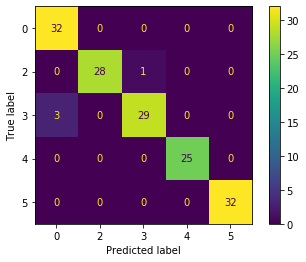

In [373]:
cm = confusion_matrix(y_train , ytrain_pred )
ConfusionMatrixDisplay(cm , display_labels=encoder.inverse_transform(model.classes_)).plot()